## <div style="text-align: center">Learn Machine Learning ON Board Titanic - 17 Algorithms </div>

<div style="text-align:center"><img src="https://merianmi.files.wordpress.com/2012/06/titanic-mrf.gif"> 
    

 </div> 
 
Here you are going to learn Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology you might already be familiar with, like NumPy, pandas, and Matplotlib!

#### The functionality that scikit-learn provides include:

- **Regression**, including Linear and Logistic Regression
- **Classification**, including K-Nearest Neighbors
- **Clustering**, including K-Means and K-Means++
- **Model selection**
- **Preprocessing**, including Min-Max Normalization

</div>




-------------------------------------------------------------

 **I hope this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**
 

<a id="top"></a> <br>
## Notebook  Content


1. [Data Science workflow](#2)
1. [Import](#3)
1. [Estimator](#4)
1. [Load Data](#5)
1. [Data Cleaning](#29)
1. [Visualization](#6)
1. [Prepare Train and Test](#7)
1. [Machine Learning Algorithms](#8)
    1. [Decision Tree](#10)
    1. [RandomForest](#11)
    1. [Logistic Regression](#12)
    1. [K-Nearest Neighbours](#13)
    1. [Naive Bayes](#14)
    1. [SVM](#15)
    1. [Nu-Support Vector Classification](#16)
    1. [Linear Support Vector Classification](#17)
    1. [Radius Neighbors Classifier](#18)
    1. [Passive Aggressive Classifier](#19)
    1. [BernoulliNB](#20)
    1. [ExtraTreeClassifier](#21)
    1. [Bagging classifier ](#22)
    1. [AdaBoost classifier](#23)
    1. [Gradient Boosting Classifier](#24)
    1. [Linear Discriminant Analysis](#25)
    1. [Quadratic Discriminant Analysis](#26)
1. [Courses](#1)    
1. [Scores](#30)
1. [References](#28)

<a id="2"></a> <br>
## 2-Data Science Workflow

There is no template for solving a data science problem. The roadmap changes with every new dataset and new problem. But we do see similar steps in many different projects. I wanted to make a clean workflow to serve as an example to aspiring data scientists. 

<img src="https://miro.medium.com/max/2000/1*3FQbrDoP1w1oibNPj9YeDw.png"> 

### Overview:

- Source the Data 
- Data Processing
- Modeling
- Model Deployment
- Model Monitoring 
- Exploration and reporting






V<a id="3"></a> <br>
## 2- Import

In [1]:
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

 #foundational package for scientific computing
import numpy as np

#collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import pandas as pd

#collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt

#Visualization
import seaborn as sns

#collection of functions for scientific computing and advance mathematics
import scipy as sp

#collection of machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="4"></a> <br>
## 3- Estimator

Given a scikit-learn estimator object named **model**, the following methods are available:

#### Available in all Estimators

**model.fit()** : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).

---------------------------------------------------------

#### Available in supervised estimators

**model.predict()** : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.

**model.predict_proba()** : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().
**model.score()** : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

---------------------------------------------------------
#### Available in unsupervised estimators

**model.predict()** : predict labels in clustering algorithms.
**model.transform()** : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
**model.fit_transform()** : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

<a id="5"></a> <br>
## 4- Load Data

In [2]:
datatrain =  pd.read_csv('train.csv')

In [3]:
#datatest =  pd.read_csv('../input/titanic/test.csv')

Check the Data

In [4]:
datatrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
datatest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
datatestcopy = datatest.copy()

In [7]:
print(datatrain.shape)
print(datatest.shape)

(891, 12)
(418, 11)


In [8]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id="29"></a> <br>
## 5- Data Cleaning 

The process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. Data cleansing may be performed interactively with data wrangling tools, or as batch processing through scripting. 

Fis

In [9]:
print('Train columns with null values: {} \n' .format( datatrain.isnull().sum()))

print('Test columns with null values: {}'.format( datatest.isnull().sum()))

Train columns with null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Test columns with null values: PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
datatrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
datatest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Now, after checkig the data lets go to Clean 

In [12]:
### we are compling the both data with median in Age, mode in Embarked and mediam in Fare

#First datatrain

datatrain['Age'].fillna(datatrain['Age'].median(), inplace = True)
datatrain['Embarked'].fillna(datatrain['Embarked'].mode()[0], inplace = True)
datatrain['Fare'].fillna(datatrain['Fare'].median(), inplace = True)

#Now the datatest 

datatest['Age'].fillna(datatest['Age'].median(), inplace = True)
datatest['Embarked'].fillna(datatest['Embarked'].mode()[0], inplace = True)
datatest['Fare'].fillna(datatest['Fare'].median(), inplace = True)

### Check the work 

In [13]:
print('Train columns with null values: {} \n' .format( datatrain.isnull().sum()))
print("*************************************")
print('Test columns with null values: {}'.format( datatest.isnull().sum()))

Train columns with null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64 

*************************************
Test columns with null values: PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [14]:
#Now we are deleting the ['PassengerId','Cabin', 'Ticket'] COLUMNS
drop_column = ['PassengerId','Cabin', 'Ticket']
datatrain.drop(drop_column, axis=1, inplace = True)
datatest.drop(drop_column, axis=1, inplace = True)

In [15]:
datatrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Now we are making Feachure Engineering for train and test 

In [16]:
alltables = [datatrain, datatest]

for dataset in alltables:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (datatrain['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
datatrain['Title'] = datatrain['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(datatrain['Title'].value_counts())
print("----------")


#preview data again
datatrain.info()
datatest.info()
datatrain.head()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null flo

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [17]:
datatest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


<a id="6"></a> <br>
## 6- Visualization
 some graphical representation of information and data.

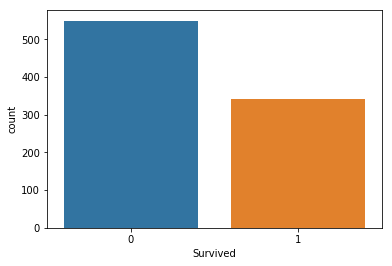

In [18]:
sns.countplot(x="Survived", data=datatrain)  # How many people survived

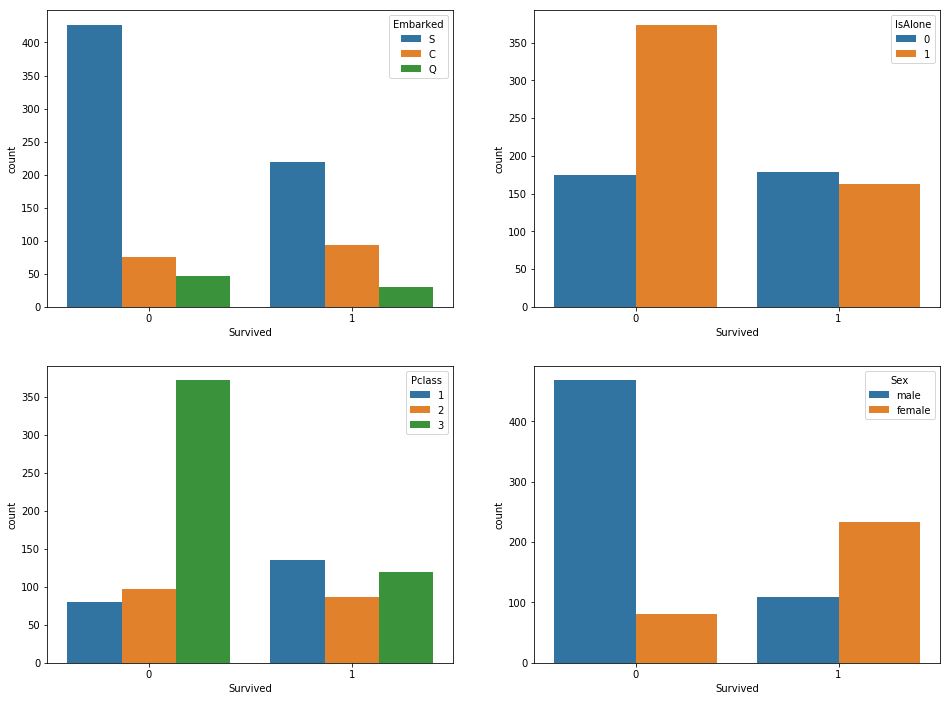

In [19]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.countplot(x='Survived', hue="Embarked", data=datatrain,ax = saxis[0,0])   
sns.countplot(x='Survived', hue="IsAlone", data=datatrain,ax = saxis[0,1])
sns.countplot(x="Survived", hue="Pclass", data=datatrain, ax = saxis[1,0])
sns.countplot(x="Survived", hue="Sex", data=datatrain, ax = saxis[1,1])


Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

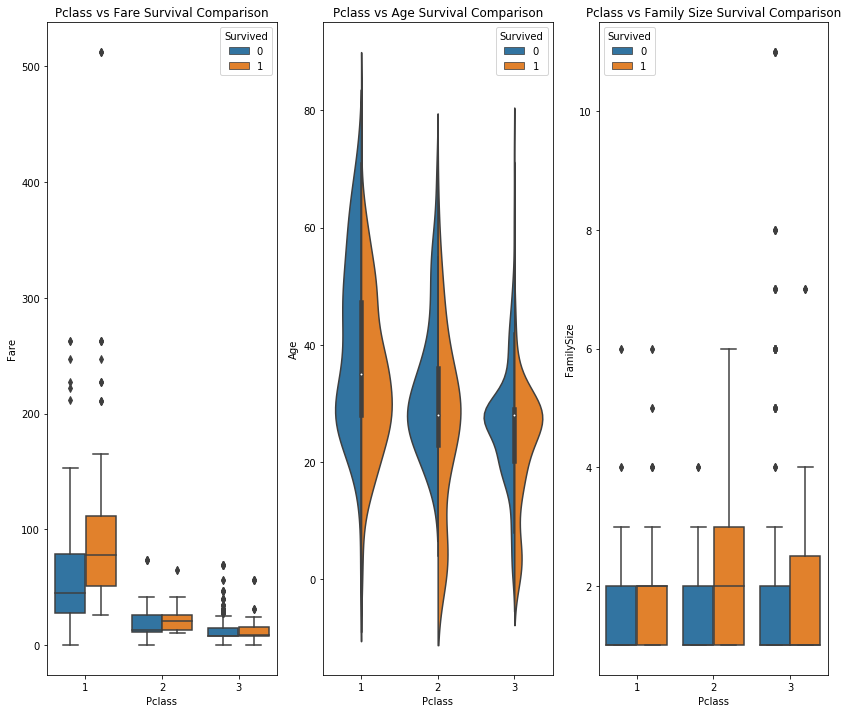

In [20]:

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = datatrain, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = datatrain, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = datatrain, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

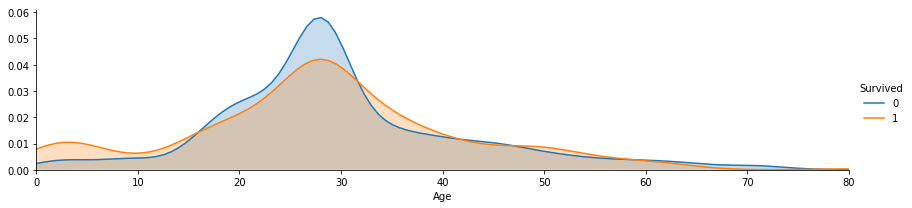

In [21]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( datatrain, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , datatrain['Age'].max()))
a.add_legend()

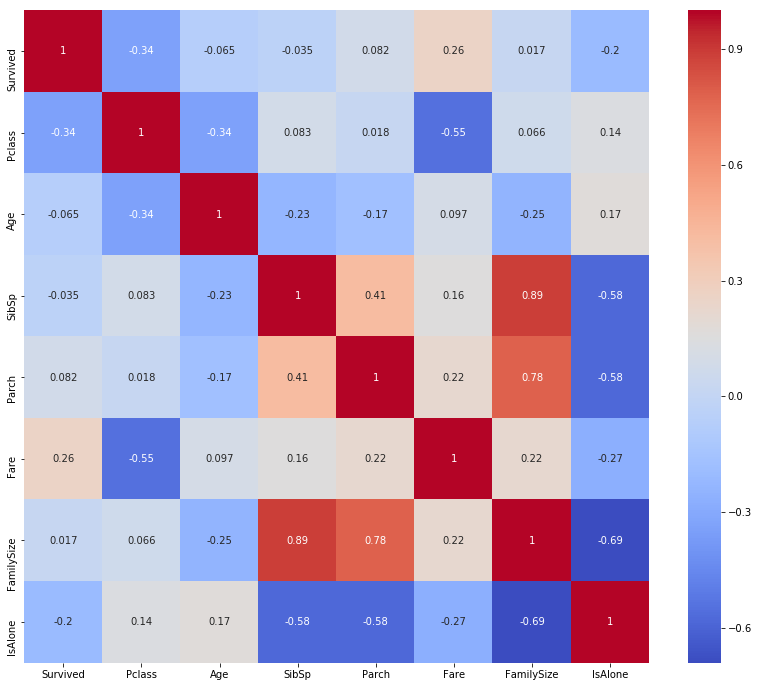

In [22]:
plt.subplots(figsize =(14, 12))
correlation = datatrain.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm')

<a id="7"></a> <br>
## 7- Convert to Categorical

convert objects to category using Label Encoder for train and test/validation dataset

In [23]:
#code categorical data
label = LabelEncoder()

for dataset in alltables:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
datatrain_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
datatrain_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
datatrain_xy =  Target + datatrain_x
print('Original X Y: ', datatrain_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
datatrain_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
datatrain_xy_bin = Target + datatrain_x_bin
print('Bin X Y: ', datatrain_xy_bin, '\n')


#define x and y variables for dummy features original
datatrain_dummy = pd.get_dummies(datatrain[datatrain_x])
datatrain_x_dummy = datatrain_dummy.columns.tolist()
datatrain_xy_dummy = Target + datatrain_x_dummy
print('Dummy X Y: ', datatrain_xy_dummy, '\n')

datatrain_dummy.head()



Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


<a id="7"></a> <br>
## 7- Prepare Train and Test

scikit-learn provides a helpful function for partitioning data, train_test_split, which splits out your data into a training set and a test set.

- Training set for fitting the model
- Test set for evaluation only

In [24]:
#split train and test data with function defaults


train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(datatrain[datatrain_x_calc], datatrain[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(datatrain[datatrain_x_bin], datatrain[Target] , random_state = 0)

print("DataTrain Shape: {}".format(datatrain.shape))
print("Train1 Shape: {}".format(train1_x_dummy.shape))
print("Test1 Shape: {}".format(test1_x_dummy.shape))


DataTrain Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


In [25]:
train1_x_dummy.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000


<a id="8"></a> <br>
## 8- Machine Learning Algorithms
<img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/12/Classification-Machine-Learning-Algorithms-Edureka.png">
Image credit:edureka.co 



<a id="10"></a> <br>
## 8-1 Decision Tree

This is one of my favorite algorithm and I use it quite frequently. It is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it works for both categorical and continuous dependent variables. In this algorithm, we split the population into two or more homogeneous sets. This is done based on most significant attributes/ independent variables to make as distinct groups as possible. 


In [26]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(train1_x_dummy, train1_y_dummy)

y_predL = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predL))
print(confusion_matrix(test1_y_dummy, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test1_y_dummy))

DT = accuracy_score(y_predL,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       139
           1       0.70      0.73      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

[[113  26]
 [ 23  61]]
accuracy is 0.7802690582959642


In [27]:
from sklearn.metrics import roc_curve, auc

In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test1_y_dummy, y_predL)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7695700582391231

Text(0.5, 0, 'False Positive Rate')

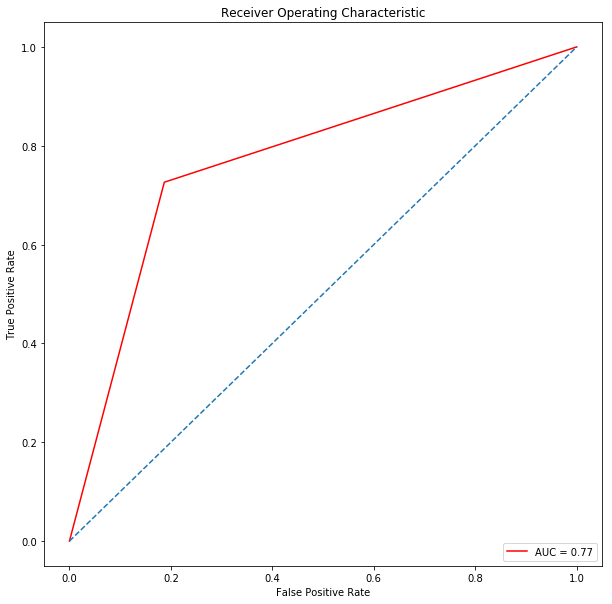

In [29]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

<a id="11"></a> <br>
## 8-2 RandomForest

Random Forest is a trademark term for an ensemble of decision trees. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

In [30]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(train1_x_dummy, train1_y_dummy)
y_predR=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_predR))
print(confusion_matrix(y_predR,test1_y_dummy))
#Accuracy Score
print('accuracy is ',accuracy_score(y_predR,test1_y_dummy))

RT = accuracy_score(y_predR,test1_y_dummy)


              precision    recall  f1-score   support

           0       0.79      0.97      0.87       139
           1       0.92      0.57      0.71        84

    accuracy                           0.82       223
   macro avg       0.86      0.77      0.79       223
weighted avg       0.84      0.82      0.81       223

[[135  36]
 [  4  48]]
accuracy is  0.820627802690583


<a id="12"></a> <br>
## 8-3 Logistic Regression

Don’t get confused by its name! It is a classification not a regression algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

In [31]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predLR = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predLR))
print(confusion_matrix(test1_y_dummy, y_predLR))
# Accuracy score
print('accuracy is',accuracy_score(y_predLR,test1_y_dummy))

LR = accuracy_score(y_predLR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.74      0.67      0.70        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223

[[119  20]
 [ 28  56]]
accuracy is 0.7847533632286996


<a id="13"></a> <br>
## 8-4 K-Nearest Neighbors

It can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.

In [32]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(train1_x_dummy, train1_y_dummy)

y_predKN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predKN))
print(confusion_matrix(test1_y_dummy, y_predKN))
# Accuracy score

print('accuracy is',accuracy_score(y_predKN,test1_y_dummy))

KNN = accuracy_score(y_predKN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       139
           1       0.68      0.38      0.49        84

    accuracy                           0.70       223
   macro avg       0.69      0.64      0.64       223
weighted avg       0.70      0.70      0.67       223

[[124  15]
 [ 52  32]]
accuracy is 0.6995515695067265


<a id="14"></a> <br>
## 8-5 Naive Bayes

It is a classification technique based on Bayes’ theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

In [33]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predN))
print(confusion_matrix(test1_y_dummy, y_predN))
# Accuracy score
print('accuracy is',accuracy_score(y_predN,test1_y_dummy))

NBB = accuracy_score(y_predN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83       139
           1       0.69      0.81      0.75        84

    accuracy                           0.79       223
   macro avg       0.78      0.80      0.79       223
weighted avg       0.80      0.79      0.80       223

[[109  30]
 [ 16  68]]
accuracy is 0.7937219730941704


<a id="15"></a> <br>
## 8-6 SVM

It is a classification method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

For example, if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates (these co-ordinates are known as Support Vectors)

In [34]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predSVM = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predSVM))
print(confusion_matrix(test1_y_dummy, y_predSVM))
# Accuracy score

print('accuracy is',accuracy_score(y_predSVM,test1_y_dummy))

SVMm = accuracy_score(y_predSVM,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       139
           1       0.67      0.63      0.65        84

    accuracy                           0.74       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223

[[113  26]
 [ 31  53]]
accuracy is 0.7443946188340808


<a id="16"></a> <br>
## 8-7 Nu-Support Vector Classification

Similar to SVC but uses a parameter to control the number of support vectors.

The implementation is based on libsvm.

In [35]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

ModelNU = NuSVC()
ModelNU.fit(train1_x_dummy, train1_y_dummy)

y_predNu = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predNu))
print(confusion_matrix(test1_y_dummy, y_predNu))
# Accuracy score

print('accuracy is',accuracy_score(y_predNu,test1_y_dummy))

NuS = accuracy_score(y_predNu,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       139
           1       0.67      0.63      0.65        84

    accuracy                           0.74       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223

[[113  26]
 [ 31  53]]
accuracy is 0.7443946188340808


<a id="17"></a> <br>
## 8-8 Linear Support Vector Classification

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

In [36]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

LSVM = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       139
           1       0.80      0.54      0.64        84

    accuracy                           0.78       223
   macro avg       0.79      0.73      0.74       223
weighted avg       0.78      0.78      0.76       223

[[128  11]
 [ 39  45]]
accuracy is 0.7757847533632287


<a id="18"></a> <br>
##  8-9 Radius Neighbors Classifier

In scikit-learn RadiusNeighborsClassifier is very similar to KNeighborsClassifier with the exception of two parameters. First, in RadiusNeighborsClassifier we need to specify the radius of the fixed area used to determine if an observation is a neighbor using radius. Unless there is some substantive reason for setting radius to some value, it is best to treat it like any other hyperparameter and tune it during model selection. The second useful parameter is outlier_label, which indicates what label to give an observation that has no observations within the radius - which itself can often be a useful tool for identifying outliers.


In [37]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=148)
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

#summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(test1_y_dummy,y_pred))

#Accouracy score
print('accuracy is ', accuracy_score(test1_y_dummy,y_pred))

RNC = accuracy_score(test1_y_dummy,y_pred)

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       139
           1       0.86      0.07      0.13        84

    accuracy                           0.65       223
   macro avg       0.75      0.53      0.45       223
weighted avg       0.72      0.65      0.53       223

[[138   1]
 [ 78   6]]
accuracy is  0.6457399103139013


<a id="19"></a> <br>
##  8-10 Passive Aggressive Classifier

PA algorithm is a margin based online learning algorithm for binary classification.
Unlike PA algorithm, which is a hard-margin based method, PA-I algorithm is a soft margin based method and robuster to noise.

In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

PAC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       139
           1       0.67      0.70      0.69        84

    accuracy                           0.76       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.76      0.76      0.76       223

[[110  29]
 [ 25  59]]
accuracy is 0.757847533632287


<a id="20"></a> <br>
##  8-11 BernoulliNB

Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

In [39]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

Ber = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.71      0.71      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

[[115  24]
 [ 24  60]]
accuracy is 0.7847533632286996


<a id="21"></a> <br>
## 8-12  ExtraTreeClassifier

ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.
Let’s look at some ensemble methods ordered from high to low variance, ending in ExtraTreesClassifier.

In [40]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

ETC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       139
           1       0.66      0.73      0.69        84

    accuracy                           0.76       223
   macro avg       0.74      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223

[[108  31]
 [ 23  61]]
accuracy is 0.757847533632287


<a id="22"></a> <br>
## 8-13 Bagging classifier 

 Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [41]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

BCC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       139
           1       0.84      0.68      0.75        84

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223

[[128  27]
 [ 11  57]]
accuracy is  0.8295964125560538


<a id="23"></a> <br>
##  8-14 AdaBoost classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [42]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

AdaB = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       139
           1       0.72      0.75      0.74        84

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

[[115  21]
 [ 24  63]]
accuracy is  0.7982062780269058


<a id="24"></a> <br>
## 8-15  Gradient Boosting Classifier

GBM is a boosting algorithm used when we deal with plenty of data to make a prediction with high prediction power. Boosting is actually an ensemble of learning algorithms which combines the prediction of several base estimators in order to improve robustness over a single estimator. It combines multiple weak or average predictors to a build strong predictor.

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
ModelG=GradientBoostingClassifier()
ModelG.fit(train1_x_dummy, train1_y_dummy)
y_predGR=ModelG.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_predGR))
print(confusion_matrix(y_predGR,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_predGR,test1_y_dummy))

GBCC = accuracy_score(y_predGR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       139
           1       0.84      0.75      0.79        84

    accuracy                           0.85       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223

[[127  21]
 [ 12  63]]
accuracy is  0.852017937219731


In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test1_y_dummy, y_predGR)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.8318345323741008

Text(0.5, 0, 'False Positive Rate')

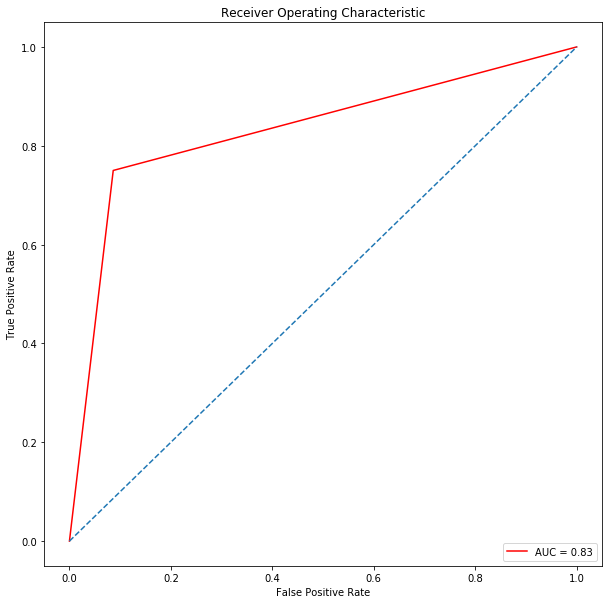

In [45]:

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

<a id="25"></a> <br>
## 8-16 Linear Discriminant Analysis

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

LDAA = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       139
           1       0.71      0.68      0.70        84

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223

[[116  27]
 [ 23  57]]
accuracy is  0.7757847533632287


<a id="26"></a> <br>
## 8-17 Quadratic Discriminant Analysis

A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

The model fits a Gaussian density to each class.

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

QDAx = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       139
           1       0.69      0.76      0.72        84

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223

[[110  20]
 [ 29  64]]
accuracy is  0.7802690582959642


<a id="1"></a> <br>
## 9-Courses  of ML  

### Best Machine Learning &amp; Deep Learning Courses [2019]


[1. Machine Learning Certification by Stanford University (Coursera)](https://www.coursera.org/learn/machine-learning?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-ajzPQo.U8IJDvdN2zJ4zsg&amp;siteID=vedj0cWlu2Y-ajzPQo.U8IJDvdN2zJ4zsg&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[2. Deep Learning Certification by deeplearning.ai (Coursera)](https://www.coursera.org/specializations/deep-learning?edocomorp=mar19affiliate20off&amp;ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-ETlb9CJE2XM9JpTjEFCAhQ&amp;siteID=vedj0cWlu2Y-ETlb9CJE2XM9JpTjEFCAhQ&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[3. Intro to Machine Learning Nanodegree Program (Udacity)](https://www.udacity.com/course/intro-to-machine-learning-nanodegree--nd229?cjevent=3f802ef9d42d11e983bf02e70a240613)

[4. Machine Learning A-Z™: Hands-On Python &amp; R In Data Science (Udemy)](https://www.udemy.com/machinelearning/?ranMID=39197&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-Ocm.SbF0Nfu1joTCmj2lcw&amp;LSNPUBID=vedj0cWlu2Y)

[5. Machine Learning Data Science Course from Harvard University (edX)](https://www.edx.org/professional-certificate/harvardx-data-science?source=aw&amp;awc=6798_1568162694_f3d200d33df1e9f4c007eab412be2dc9&amp;utm_source=aw&amp;utm_medium=affiliate_partner&amp;utm_content=text-link&amp;utm_term=427859_Digital+Defynd)

[6. Deep Learning Course by IBM (edX)](https://www.edx.org/professional-certificate/ibm-deep-learning?source=aw&amp;awc=6798_1568162738_1040cabaa57d2f05641cb016f73b28e1&amp;utm_source=aw&amp;utm_medium=affiliate_partner&amp;utm_content=text-link&amp;utm_term=427859_Digital+Defynd)

[7. Mathematics for Machine Learning by Imperial College London (Coursera)](https://www.coursera.org/specializations/mathematics-machine-learning?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-xLidZLlpjC8Gv_s2W4ZnVw&amp;siteID=vedj0cWlu2Y-xLidZLlpjC8Gv_s2W4ZnVw&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[8. Machine Learning – Artificial Intelligence by Columbia University (edX)](https://www.edx.org/micromasters/columbiax-artificial-intelligence?source=aw&amp;awc=6798_1568162785_8665fc7be3791239252b43c78fc25d47&amp;utm_source=aw&amp;utm_medium=affiliate_partner&amp;utm_content=text-link&amp;utm_term=427859_Digital+Defynd)

[9. Free College Machine Learning Courses (edX)](https://www.edx.org/learn/machine-learning?source=aw&amp;awc=6798_1568162807_f9cb6b1e897a5e949c8f61b160df08fb&amp;utm_source=aw&amp;utm_medium=affiliate_partner&amp;utm_content=text-link&amp;utm_term=427859_Digital+Defynd)

[10. Machine Learning &amp; AI Courses (fast.ai)](https://www.fast.ai/)

[11. Advanced Machine Learning Course by HSE (Coursera)](https://www.coursera.org/specializations/aml?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-e8Umkx_VMoYhoLYF2JIiLA&amp;siteID=vedj0cWlu2Y-e8Umkx_VMoYhoLYF2JIiLA&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[12. Python for Data Science and Machine Learning Bootcamp (Udemy)](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/?ranMID=39197&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-2yZi8gUVywIuAglcc34W9Q&amp;LSNPUBID=vedj0cWlu2Y)

[13. Deep Learning A-Z™: Hands-On Artificial Neural Networks (Udemy)](https://www.udemy.com/deeplearning/?ranMID=39197&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-XBUM5R9N4AO.GHduAzNNpg&amp;LSNPUBID=vedj0cWlu2Y)

[14. Python for Everybody by University of Michigan (Coursera)](https://www.coursera.org/specializations/python?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-Lc2RCZhix6fikqVzdQwKiw&amp;siteID=vedj0cWlu2Y-Lc2RCZhix6fikqVzdQwKiw&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)

[15. Deep Learning in Python (DataCamp)](https://www.datacamp.com/courses/deep-learning-in-python?tap_a=5644-dce66f&amp;tap_s=463826-784532)

[16. Machine Learning Certification by University of Washington (Coursera)](https://www.coursera.org/specializations/machine-learning?ranMID=40328&amp;ranEAID=vedj0cWlu2Y&amp;ranSiteID=vedj0cWlu2Y-Cn0Cca6uS1hGwdb17rhacQ&amp;siteID=vedj0cWlu2Y-Cn0Cca6uS1hGwdb17rhacQ&amp;utm_content=10&amp;utm_medium=partners&amp;utm_source=linkshare&amp;utm_campaign=vedj0cWlu2Y)


## [LINK](https://www.kaggle.com/getting-started/108343)

<a id="30"></a> <br>
## 10- Scores

In [48]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest',
              'LogisticRegression','K-Nearest Neighbours', 'Naive Bayes', 'SVM', 'Nu-Support Vector Classification',
             'Linear Support Vector Classification', 'Radius Neighbors Classifier', 'Passive Aggressive Classifier','BernoulliNB',
             'ExtraTreeClassifier', "Bagging classifier ", "AdaBoost classifier", 'Gradient Boosting Classifier' ,'Linear Discriminant Analysis',
             'Quadratic Discriminant Analysis'],
    'Score': [DT, RT, LR, KNN,NBB,SVMm, NuS,  LSVM , RNC, PAC, Ber, ETC, BCC, AdaB,  GBCC, LDAA, QDAx]})
models.sort_values(by='Score', ascending=False)

,Model,Score
14,Gradient Boosting Classifier,0.852018
12,Bagging classifier,0.829596
1,Random Forest,0.820628
13,AdaBoost classifier,0.798206
4,Naive Bayes,0.793722
2,LogisticRegression,0.784753
10,BernoulliNB,0.784753
0,Decision Tree,0.780269
16,Quadratic Discriminant Analysis,0.780269
7,Linear Support Vector Classification,0.775785


Text(0, 0.5, 'Algorithm')

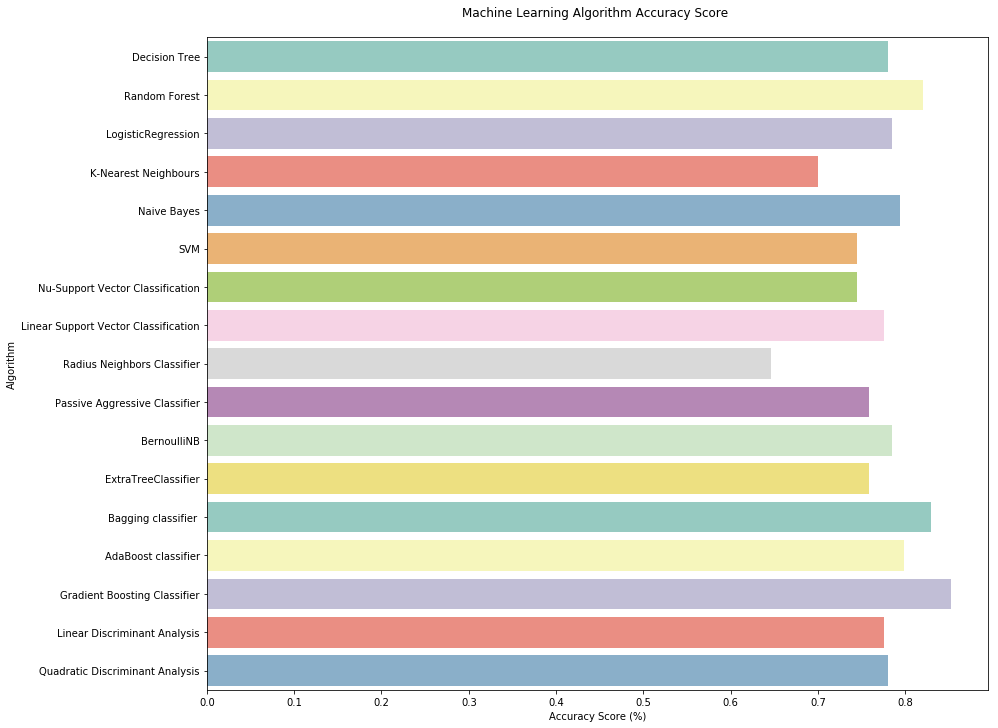

In [49]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

####  **I hope you find this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**

In [50]:
#gradient boosting w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77033
submit_gbc = GradientBoostingClassifier()

submit_gbc.fit(datatrain[datatrain_x_bin], datatrain[Target])

rr = submit_gbc.predict(datatest[datatrain_x_bin])

In [51]:
rr

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Submit

In [52]:
submission = pd.DataFrame({
        "PassengerId": datatestcopy["PassengerId"],
        "Survived": rr
    })
submission.to_csv('titanic_submission1.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


## You can also check this kernels for more tips

- [Top Data Visualization Libraries Tutorial](https://www.kaggle.com/marcovasquez/top-data-visualization-libraries')
- [Machine Learning using Python](https://www.kaggle.com/marcovasquez/machine-learning-for-beginners)


####  **I hope you find this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated. Thanks you**


<a id="28"></a> <br>
## 11- References

1. [Coursera](https://www.coursera.org/specializations/data-science-python)
1. [Sklearn](https://scikit-learn.org/stable/)
1. [ML Step by Step](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)
1. [ML by Stanford University](https://www.coursera.org/learn/machine-learning/)
1. [Train and Test Split](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)
1. [Machine Learning A-Z™: Hands-On Python & R In Data Science (Udemy)](https://www.udemy.com/machinelearning/)
1. [Deep Learning A-Z™: Hands-On Artificial Neural Networks](https://www.udemy.com/deeplearning/)
1. [Scikit-Leanr Intro](https://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-intro.ipynb)
1. [Notebook cleaning](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)
1. [Top 10 ML courses](https://www.kaggle.com/getting-started/108343)




####  **I hope you find this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated. Thanks you**

###### [Go to top](#top)